#Resolução teste técnico HealthBit

Este notebook possui as minhas resoluções das questões técnicas da etapa técnica para a vaga de estágio em Dados da empresa HealthBit.


##Informações iniciais

As células de códigos abaixo servem para subir as bases de dados e as bibliotecas pyhton que serão utilizados durante a resoluçõ dos exercícios.

OBS: As bases estão diferentes pois realizei alguns tratamentos simples nas planilhas excel para facilitar a manipulação

In [44]:
pip install pandas

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo Excel
sinistros_excel = '/Sinistros_base (2).xlsx'
cadastros_excel = '/Cadastro_base (2).xlsx'

# Carregar o arquivo Excel em um DataFrame
df_sinistros = pd.read_excel(sinistros_excel)
df_cadastros = pd.read_excel(sinistros_excel)

print(df_sinistros)
print("\n--------------------------------------------------------------\n")
print(df_cadastros)

           PERIODO  CODIGO_EVENTO      FONTE   PLANO TITULARIDADE  \
0       01-01-2020       10101012       REDE  Básico      TITULAR   
1       01-01-2020       10101012       REDE  Básico   DEPENDENTE   
2       01-01-2020       10101012       REDE  Básico   DEPENDENTE   
3       01-01-2020       10101012       REDE  Básico   DEPENDENTE   
4       01-01-2020       10101012       REDE  Básico   DEPENDENTE   
...            ...            ...        ...     ...          ...   
101715  01-12-2020       20104227  REEMBOLSO  Básico   DEPENDENTE   
101716  01-12-2020       20104227  REEMBOLSO  Básico   DEPENDENTE   
101717  01-12-2020       50000470       REDE  Básico   DEPENDENTE   
101718  01-12-2020       20104227  REEMBOLSO  Básico   DEPENDENTE   
101719  01-12-2020       20104227  REEMBOLSO  Básico   DEPENDENTE   

        CODIGO_DA_FAMILIA  CODIGO_PESSOA   DT_EVENTO  PRESTADOR  VL_EVENTO  \
0                   237.0          558.0  29/10/2019          1      72.49   
1              

## Resolução do exercício 1:

Questão: Sinistro do maior utilizador (High User), ou seja, qual beneficiário teve gastos mais elevados no período e qual foi o custo?

In [47]:
# Agrupando as pessoas e realizando a soma dos custos delas
custo_por_pessoa = df_sinistros.groupby('CODIGO_PESSOA')['VL_EVENTO'].sum()

# Identificando qual pessoa tem o maior custo
id_pessoa_maior_gasto = custo_por_pessoa.idxmax()

# Identificando maior custo
custo_mais_elevados = custo_por_pessoa.max()

print('A pessoa que teve mais gastos tem o ID: ', id_pessoa_maior_gasto, ' e o custo foi de R$:', custo_mais_elevados)

A pessoa que teve mais gastos tem o ID:  230.0  e o custo foi de R$: 4937923.38


## Resolução do exercício 2:

Questão: Apresente o custo de sinistro total (valor absoluto e %) e o custo de sinistro per capita (considerando número total de pessoas cadastradas) do período por plano.

In [49]:
# Pegando o custo total por periodo e plano
custo_total = df_sinistros.groupby(['PERIODO', 'PLANO'])['VL_EVENTO'].sum().reset_index()

print("Custo total por periodo e plano:")
print(custo_total)

# Pegando a quantidade total de pessoas por periodo e plano
pessoas_total = df_sinistros.groupby(['PERIODO', 'PLANO'])['CODIGO_PESSOA'].nunique().reset_index()

# anexando dados de pessoas ao de valores
dados_sinistro_pessoas = pd.merge(custo_total, pessoas_total, on=['PERIODO', 'PLANO'], how='left')

# Pegando o custo de sinistro per capita
dados_sinistro_pessoas['CUSTO_PER_CAPITA'] = dados_sinistro_pessoas['VL_EVENTO'] / dados_sinistro_pessoas['CODIGO_PESSOA']

print("Custo per capita:")
print(dados_sinistro_pessoas)

# Calcular o custo de sinistro total em % (em relação ao total geral)
total_geral = dados_sinistro_pessoas['VL_EVENTO'].sum()
dados_sinistro_pessoas['Custo_PORCENTAGEM'] = (dados_sinistro_pessoas['VL_EVENTO'] / total_geral) * 100

print("Custo total em relação ao total geral em %")
print(dados_sinistro_pessoas)

Custo total por periodo e plano:
       PERIODO     PLANO  VL_EVENTO
0   01-01-2020    Básico  318457.08
1   01-01-2020     Médio   43868.69
2   01-01-2020  Superior   31922.24
3   01-01-2021    Básico  449862.80
4   01-01-2021     Médio  147956.79
..         ...       ...        ...
67  01-12-2019     Médio   87516.56
68  01-12-2019  Superior   36673.82
69  01-12-2020    Básico  651927.70
70  01-12-2020     Médio  105441.08
71  01-12-2020  Superior   51967.12

[72 rows x 3 columns]
Custo per capita:
       PERIODO     PLANO  VL_EVENTO  CODIGO_PESSOA  CUSTO_PER_CAPITA
0   01-01-2020    Básico  318457.08            393        810.323359
1   01-01-2020     Médio   43868.69            101        434.343465
2   01-01-2020  Superior   31922.24             31       1029.749677
3   01-01-2021    Básico  449862.80            342       1315.388304
4   01-01-2021     Médio  147956.79            135       1095.976222
..         ...       ...        ...            ...               ...
67  01-12-2

## Resolução do exercício 3:

Questão: Qual o custo de sinistro (R$)  por mês/ano por data de referência?

In [34]:
# Fazendo o casting de 'DT_EVENTO' para datetime
df_sinistros['DT_EVENTO'] = pd.to_datetime(df_sinistros['DT_EVENTO'])

# Pegando o mes da data de referencia
df_sinistros['MES_ANO'] = df_sinistros['DT_EVENTO'].dt.to_period('M')
df_sinistros['DT_REFERENCIA'] = df_sinistros['DT_EVENTO'].dt.date

# Calcular o custo de sinistro por mês/ano e data de referência
custo_por_mes_ano = df_sinistros.groupby(['MES_ANO', 'DT_REFERENCIA'])['VL_EVENTO'].sum().reset_index()

print("A tabela abaixo mostra os dados:")
print(custo_por_mes_ano)


A tabela abaixo mostra os dados:
      MES_ANO DT_REFERENCIA  VL_EVENTO
0     2001-01    2001-01-01       0.00
1     2016-02    2016-02-12    1111.92
2     2016-07    2016-07-12       4.81
3     2016-08    2016-08-11       3.46
4     2016-08    2016-08-12       0.07
...       ...           ...        ...
1417  2021-11    2021-11-03    7140.55
1418  2021-12    2021-12-01   13568.99
1419  2021-12    2021-12-02   11870.94
1420  2021-12    2021-12-03    5103.23
1421  2021-12    2021-12-04     381.55

[1422 rows x 3 columns]


## Resolução do exercício 4:

Questão: Qual plano traz mais preocupações em termos de custo? Por qual motivo?

Custo de sinistro por plano:
PLANO
Básico      14693786.10
Médio        2642291.53
Superior     1071340.53
Name: VL_EVENTO, dtype: float64



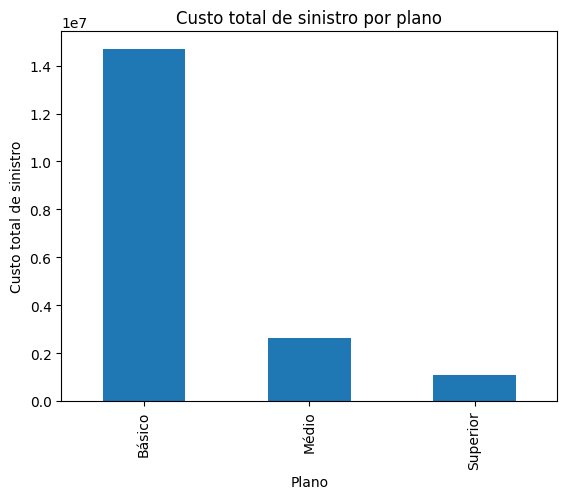

In [50]:
# Calcular o custo total de sinistro por plano
custo_plano = df_sinistros.groupby('PLANO')['VL_EVENTO'].sum()

print("Custo de sinistro por plano:")
print(custo_plano)
print()

# Grafico simples para ilustrar
custo_plano.plot(kind='bar')
plt.xlabel('Plano')
plt.ylabel('Custo total de sinistro')
plt.title('Custo total de sinistro por plano')
plt.show()

## Resolução do exercício 5:

Questão: Identificou algum problema na base que pode prejudicar a análise de dados? Qual(is) seriam?

Antes de iniciar a resolução das questões propostas, eu decide olhar um pouco das bases de dados e acabei realizando os seguintes tratamentos, no Excel, para melhorar a forma de lidar com os dados dentro do código:
* Em ambas as bases fiz a mudança dos nomes dos atributos/colunas visando remover os acentos/espaços entre os nomes e encurtá-los.
* Fiz o processo de remoção dos dados duplicados em ambas as bases.
* Mudei os valores da coluna de INTERNAÇÃO da base de sinistros para 0 e 1 (valores booleanos) no lugar de sim ou não.

Procedimentos de tratamento/normalização dos dados são importantes, pois evitam que as análises feitas em cima da base sejam inconsistentes.
Um exemplo de erro que poderia acontecer nestas bases seria o cálculo errado dos valores de custo que precisaram ser feitos em quase todos os exercícios. Se esses cálculos forem feitos com dados suplicados, os valores serão maiores do que deveriam ser, e a análise estaria errada.


